# LangChain is a tool which use to create LLM apps
        - which provide access to different models
        - capabilities to combine few LLMs as a chain
        - different prompting styles
        - write dynamic prompts using PromptTemplates

# Sample Prompt Templates

#### Few Shot Learning Prompt Template
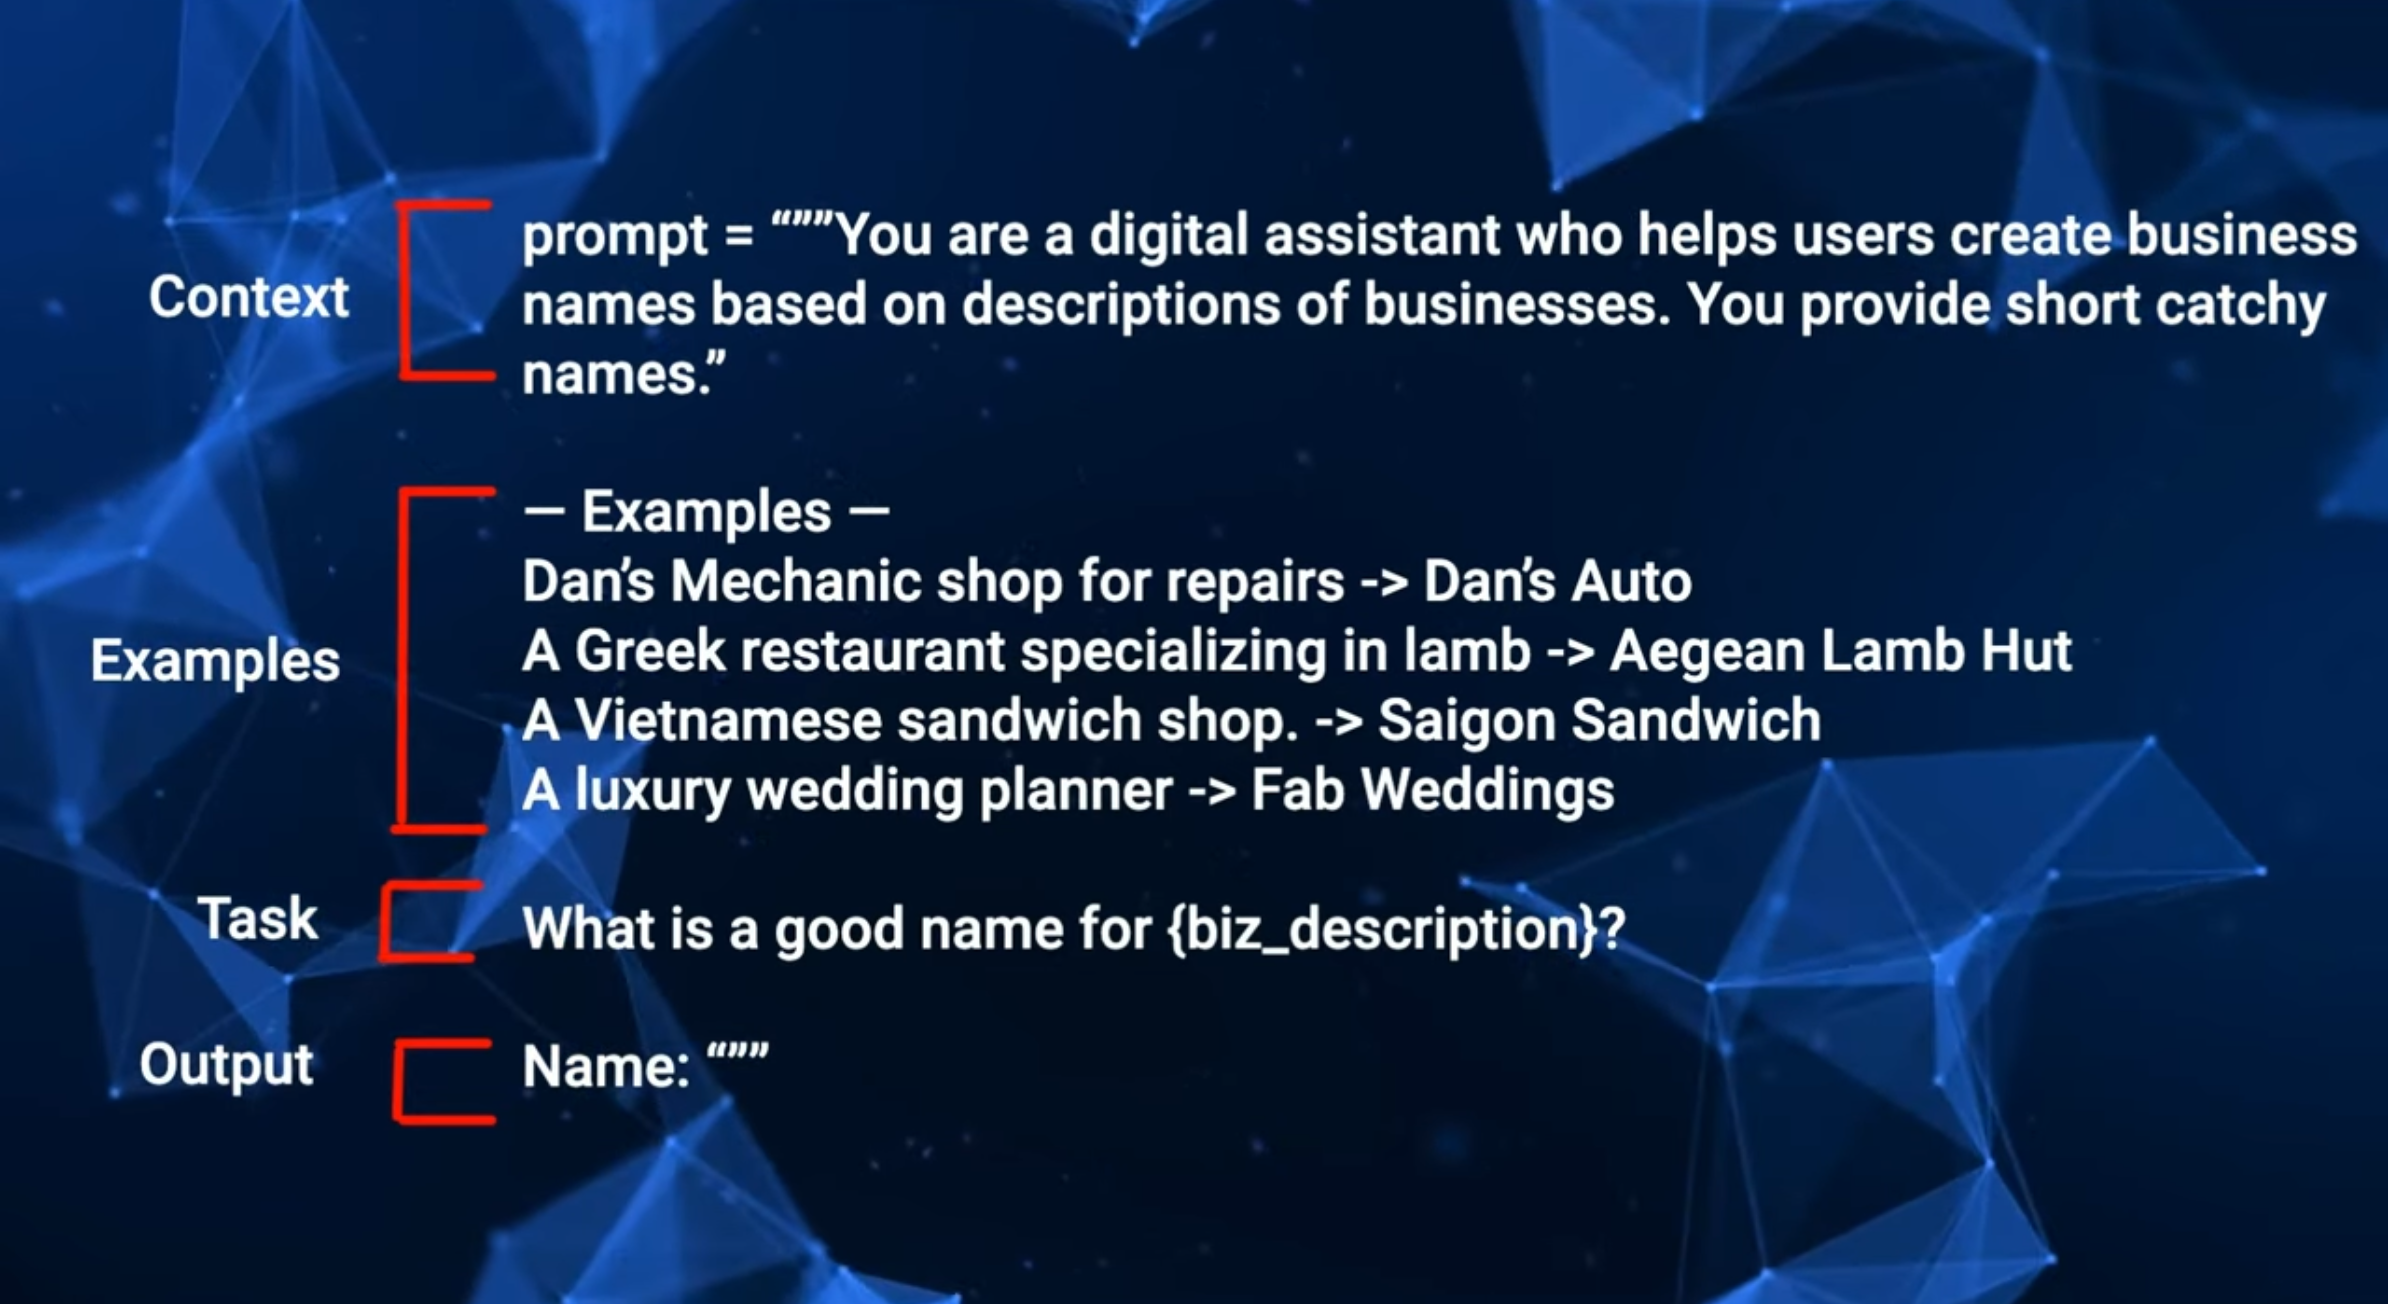

#### General Prompt Template
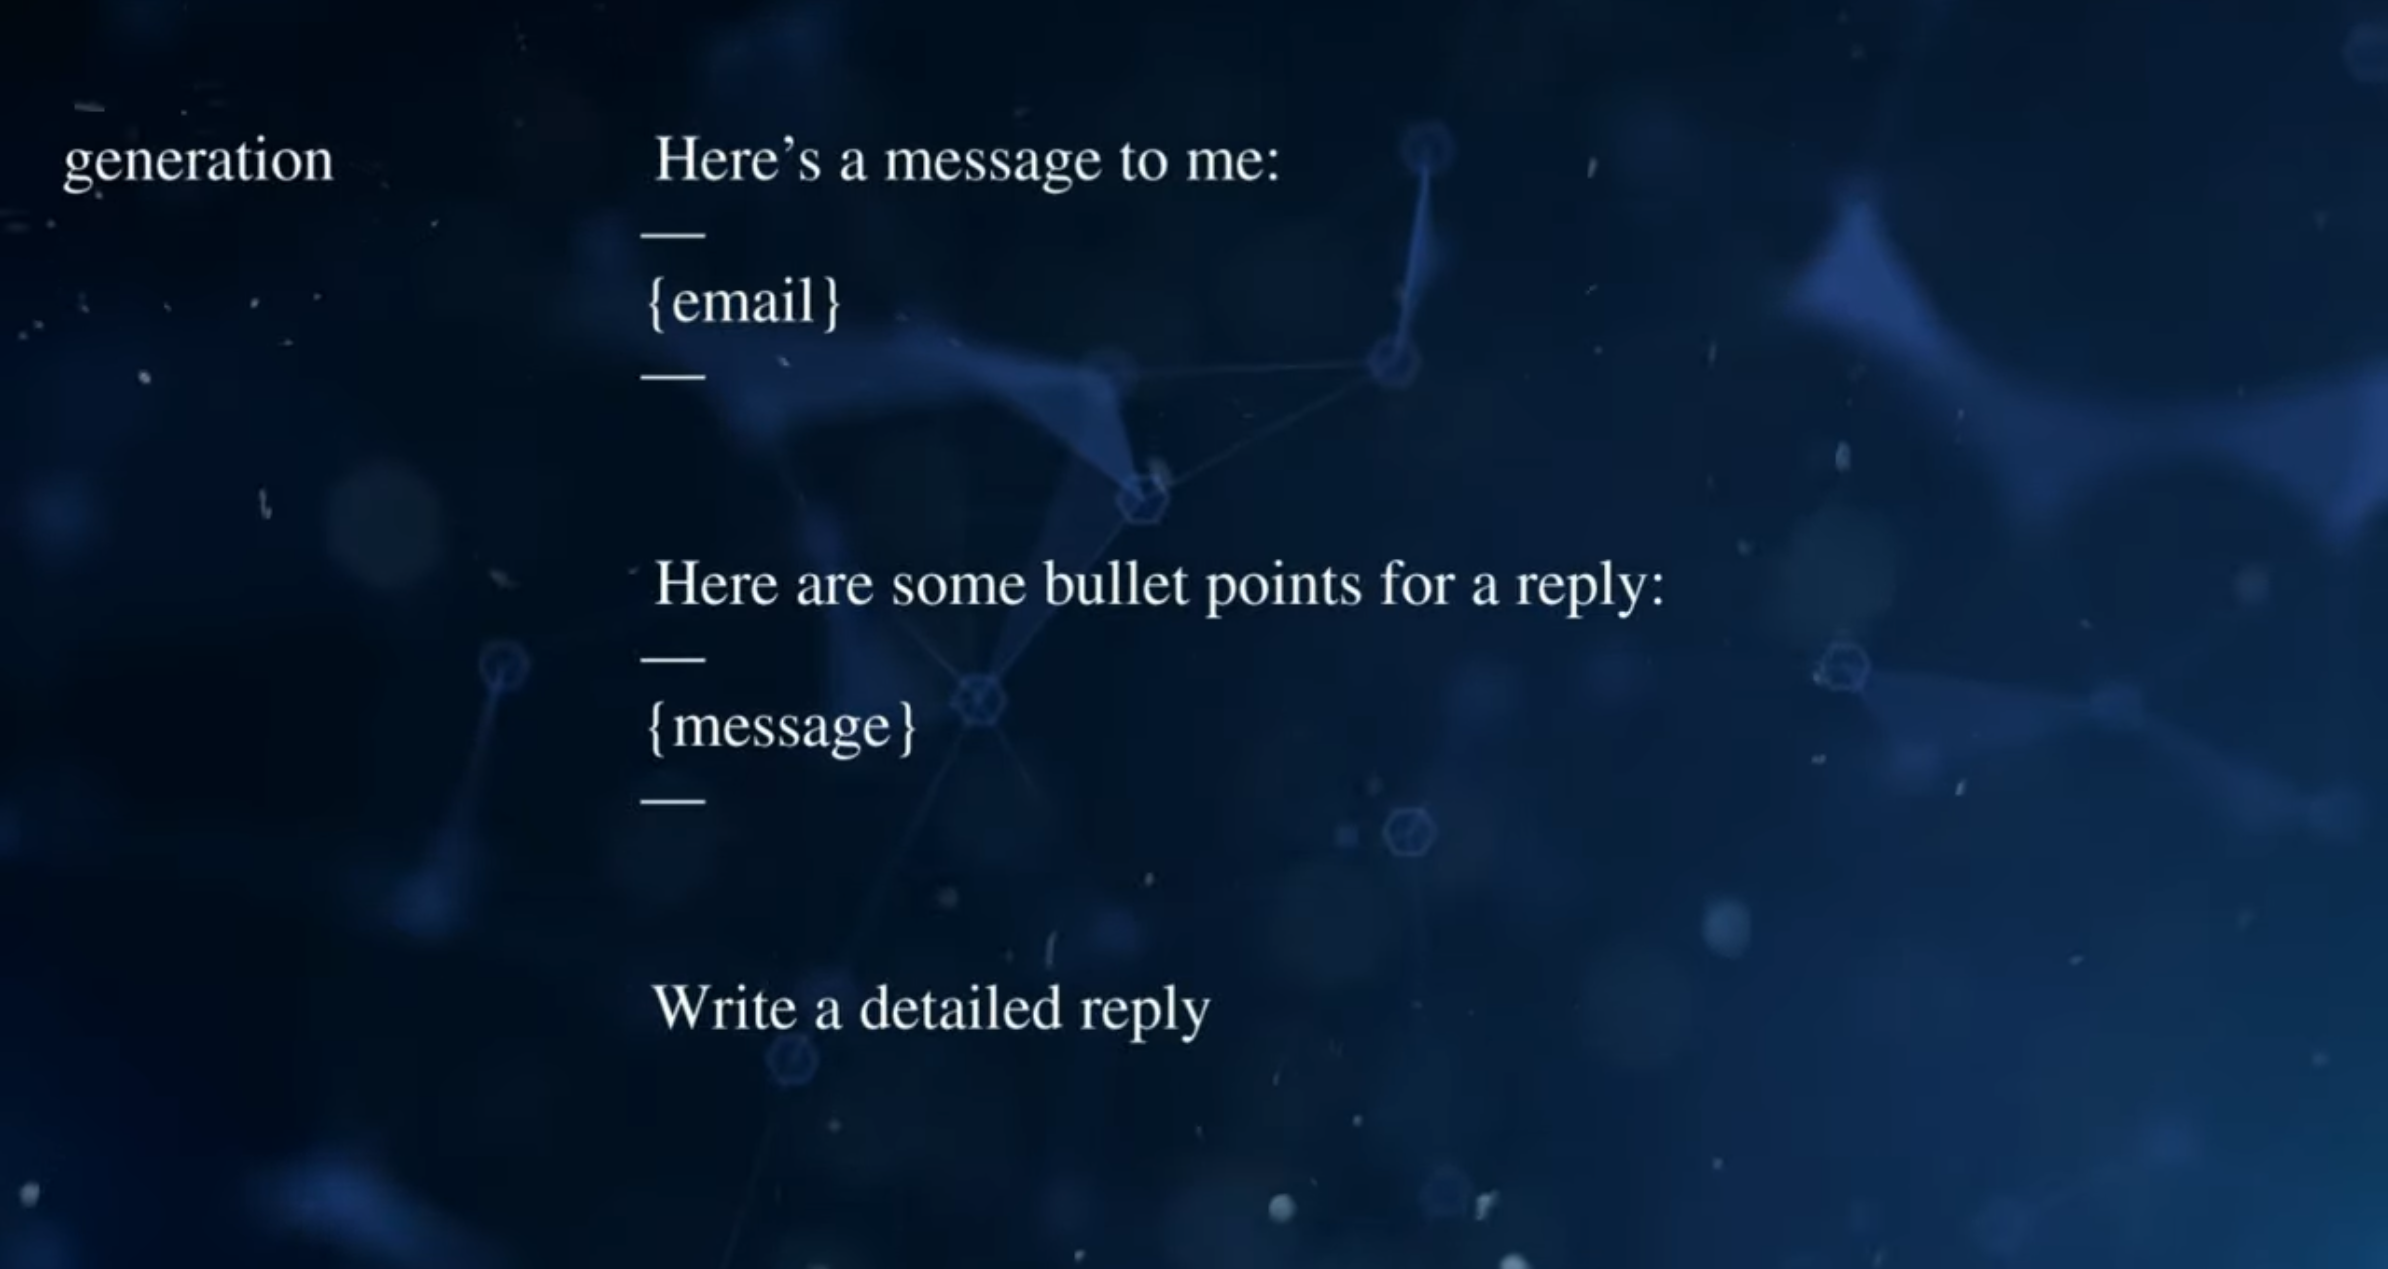

In [30]:
import yaml, os, openai
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate, FewShotPromptTemplate

In [16]:
with open('cadentials.yaml') as f:
    credentials = yaml.load(f, Loader=yaml.FullLoader)

os.environ['OPENAI_API_KEY'] = credentials['OPENAI_API_KEY']
os.environ['HUGGINGFACEHUB_API_TOKEN'] = credentials['HUGGINGFACEHUB_API_TOKEN']
os.environ['ENGINE'] = credentials['ENGINE']

openai.api_key = credentials['OPENAI_API_KEY']
openai.api_base = credentials['OPENAI_API_BASE']
openai.api_type = credentials['OPENAI_API_TYPE']
openai.api_version = credentials['OPENAI_API_VERSION']
openai.engine = credentials['ENGINE']

In [20]:
llm = ChatOpenAI(
                openai_api_key=os.environ["OPENAI_API_KEY"],
                engine = os.environ["ENGINE"],
                model='gpt-3.5-turbo',
                temperature=0.9, 
                max_tokens = 256
                )

WARNING! engine is not default parameter.
                    engine was transferred to model_kwargs.
                    Please confirm that engine is what you intended.


# Direct Prompting

In [21]:
text = "Why did the duck cross the road?"
llm.predict(text)

'To get to the other side.'

# Prompt Template - Zero Shot

In [24]:
restaurant_template = """
I want you to act as a naming consultant for new restaurants.

Return a list of restaurant names. Each name should be short, catchy and easy to remember. It shoud relate to the type of restaurant you are naming.

What are some good names for a restaurant that is {restaurant_desription}?
"""

prompt = PromptTemplate(
                        input_variables=["restaurant_desription"],
                        template=restaurant_template,
                        )

prompt_template = PromptTemplate(
                                input_variables=["restaurant_desription"], 
                                template=restaurant_template
                                )

In [25]:
description_01 = "a Greek place that serves fresh lamb souvlakis and other Greek food "
description_02 = "a burger place that is themed with baseball memorabilia"
description_03 = "a cafe that has live hard rock music and memorabilia"

In [27]:
print(prompt_template.format(restaurant_desription=description_01))


I want you to act as a naming consultant for new restaurants.

Return a list of restaurant names. Each name should be short, catchy and easy to remember. It shoud relate to the type of restaurant you are naming.

What are some good names for a restaurant that is a Greek place that serves fresh lamb souvlakis and other Greek food ?



In [29]:
chain = LLMChain(llm=llm, prompt=prompt_template)
print(chain.run(description_03))

1. Rockin' Java
2. Café Amped
3. Hard Rock Caféteria
4. Riffs & Roasts
5. The Rockin' Bean
6. Rock n' Brews
7. Java Jam
8. Hard Rock Bistro
9. Café Legends
10. Rockin' Grind


# Prompt Template - Few Shot

In [33]:
examples = [
    {"word": "happy", "antonym": "sad"},
    {"word": "tall", "antonym": "short"},
]

example_formatter_template = """
Word: {word}
Antonym: {antonym}\n
"""
example_prompt = PromptTemplate(
                            input_variables=["word", "antonym"],
                            template=example_formatter_template,
                            )

few_shot_prompt = FewShotPromptTemplate(
                                        examples=examples,
                                        example_prompt=example_prompt,
                                        prefix="Give the antonym of every input",
                                        suffix="Word: {input}\nAntonym:",
                                        input_variables=["input"],
                                        example_separator="\n\n",
                                        )

In [34]:
print(few_shot_prompt.format(input="big"))

Give the antonym of every input


Word: happy
Antonym: sad




Word: tall
Antonym: short



Word: big
Antonym:


In [35]:
chain = LLMChain(llm=llm, prompt=few_shot_prompt)
print(chain.run("Big"))

small
